In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('./drive/MyDrive/sharif/MachineLearning/ipython(guide)')

In [ ]:
! ls ../Data

### Libs

In [ ]:
! pip install scikit-multilearn

In [ ]:
from sklearn.model_selection import train_test_split , cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import plot_confusion_matrix,precision_score,recall_score,\
        classification_report,f1_score,confusion_matrix,plot_roc_curve
import matplotlib.pyplot as plt
import numpy
import time
import pandas
import pandas as pd
from joblib import dump,load
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import re
import ast
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from google.colab import drive


# Preprocessing Data

### Limit Number of Samples




In [ ]:
data = pandas.read_excel('../labels.xlsx')
data = data.rename(columns={'labels': 'tag','text':'body'})
data = data.dropna().reset_index(drop=True)
data.head()

,Unnamed: 0,body
0,0,به عنوان یک برنامه نویس اندروید چطوری می توانی...
1,1,مهدی سادات حسینی دانشجو دوست کار دوست کامپیوتر...
2,2,کد مخف اندروید کد مخف اندروید اندروید کد کد پر...
3,3,با سلام خدمت شما خوانندگان عزیز تو این مطلب که...
4,4,حالا این که وقتی دیجیتال مارکتر به مانیتور خیر...


## Preprocessing

In [ ]:
! pip install hazm

     |████████████████████████████████| 317kB 7.6MB/s 
     |████████████████████████████████| 235kB 12.8MB/s 
     |████████████████████████████████| 1.4MB 8.6MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=153922 sha256=444fc4be41192c99ff93e0ea722f257c50ce8d3551508073c9cc4ba31717455e
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394471 sha256=f9541a3002751cd2398dcc3d782a2088b677fbe98feaf1f7ea621a3126335e3a
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from hazm import *
normalizer=Normalizer()
stemmer=Stemmer()
lemmatizer=Lemmatizer()

def Normalizer(text):

    # normalizer = Normalizer()
    normalized = normalizer.normalize(text)

    return normalized


def SentenceSplitter_Tokenizer(text):

    Tokens=list(word_tokenize(text))

    return Tokens

def Stemmer(token):

    stemming=[]
    for word in token:
        stemming.append(lemmatizer.lemmatize(word))

    return stemming

def RemoveStopwords_Punc(token):

    with open('../Data/stopwords') as f:
        sw = [line.rstrip().replace(" ","").replace("\u200c","") for line in f]
    # print(sw)

    punctuation = '!"#$%&\'()*+–,-./:;<=>?@[\\]^_`{|}~،؟«؛'
    result=[]
    for word in token:
        for s in punctuation:
            if s in word:
                word=word.replace(s,"")
            # print(word)
        if word.replace(" ","").replace("\u200c","") in sw:
            continue

        result.append(word)

    # print(result)
    return result

def EmojiRemoving(text):

    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"  # dingbats
                      u"\u3030"
                      "]+", re.UNICODE)
    text= re.sub(emoj, '', text)

    return text


In [ ]:
data = data.dropna().reset_index(drop=True) # in finalrun, comment it
slice_size = 150
for i in range(len(data)):
    text=data.loc[i,"body"]
    text = text.replace("\u200c", " ")
    text = text.replace("های ", " ها ی ")
    text = text.replace("ها ", " ها ")
    text=EmojiRemoving(text)
    normalized = Normalizer(text)
    split = SentenceSplitter_Tokenizer(normalized)
    tokens = RemoveStopwords_Punc(split)
    tokens = [t for t in tokens if len(t)>2]
    tokens_slice = []
    if len(tokens)> 2*slice_size:
      tokens_slice += tokens[:slice_size]
      tokens_slice += tokens[-slice_size:]
    else:
      tokens_slice += tokens
    data.loc[i, "body"]=re.sub('\'|,|\[|\]','',str(tokens_slice))
    
    if i%100==0:
      print("Record: up to "+str(i)+" from " ,str(len(data)),"is processed.")

Record: up to 0 from  3653 is processed.
Record: up to 100 from  3653 is processed.
Record: up to 200 from  3653 is processed.
Record: up to 300 from  3653 is processed.
Record: up to 400 from  3653 is processed.
Record: up to 500 from  3653 is processed.
Record: up to 600 from  3653 is processed.
Record: up to 700 from  3653 is processed.
Record: up to 800 from  3653 is processed.
Record: up to 900 from  3653 is processed.
Record: up to 1000 from  3653 is processed.
Record: up to 1100 from  3653 is processed.
Record: up to 1200 from  3653 is processed.
Record: up to 1300 from  3653 is processed.
Record: up to 1400 from  3653 is processed.
Record: up to 1500 from  3653 is processed.
Record: up to 1600 from  3653 is processed.
Record: up to 1700 from  3653 is processed.
Record: up to 1800 from  3653 is processed.
Record: up to 1900 from  3653 is processed.
Record: up to 2000 from  3653 is processed.
Record: up to 2100 from  3653 is processed.
Record: up to 2200 from  3653 is processed.


In [ ]:
data.shape

(3653, 2)

In [ ]:
data.head()

,Unnamed: 0,body
0,0,برنامه نویس اندروید چطوری می\u200cتوانید کارها...
1,1,مهدی سادات حسینی دانشجو دوست کار دوست کامپیوتر...
2,2,مخف اندروید مخف اندروید اندروید پرداخته سریال ...
3,3,سلام خدمت خوانندگان عزیز مطلب نوشتهu ۲۰۰ cام م...
4,4,دیجیتال مارکتر مانیتور کار میu ۲۰۰ cکند ابزاره...


## FreqDist

In [ ]:
from nltk import FreqDist

In [ ]:
all_tokens = []
for body in data['body']:
  all_tokens+= re.sub('\'|\"|\[|\]| ',',',body).split(',')

In [ ]:
fd_all = FreqDist(all_tokens)
fd_all[0]

0

In [ ]:
keys = pd.DataFrame([(item,fd_all[item]) for item in fd_all])
keys.columns = ['word','freq']
keys = keys.sort_values(by=['freq'],ascending=False)
keys = keys.reset_index(drop=True)

In [ ]:
keys.head()

,word,freq
0,۲۰۰,38763
1,میu,12165
2,کار,5875
3,برنامه,5428
4,زبان,2992


# Vectorizing


## 1 - Collecting Data


#### TF-ICF words

In [ ]:
# most of words with frequency of 1, are noises or bad detected
freq_dist_slice = keys.sort_values(by='freq',ascending=False)[keys['freq']>2]
print(len(freq_dist_slice))
freq_dist_slice

18923


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,word,freq
0,۲۰۰,38763
1,میu,12165
2,کار,5875
3,برنامه,5428
4,زبان,2992
...,...,...
16475,نبره,3
16479,کنیدپس,3
16478,چیشد,3
16477,قاشق,3


## 2 - Extract Features


#### TF-IDF words

In [ ]:
# max_features = int(freq_dist_slice.shape[0])
# max_features

In [ ]:
# vectorizer = TfidfVectorizer(analyzer='word')#, max_features=max_features
# X = vectorizer.fit_transform(data['body'])
# print(type(X))
# print(X.shape)
# pickle.dump(vectorizer,open("../Data/tf_idf_50.pkl","wb"))

In [ ]:
# "../Data/tf_idf_50.pkl"
# to load 
tf = pickle.load(open("../Data/tf_idf_50.pkl", 'rb'))

In [ ]:
# feature_names = vectorizer.get_feature_names()
X = tf.transform(data['body'])

In [ ]:
X.shape

(3653, 45107)

#### SVD

In [ ]:
# svd = TruncatedSVD(n_components=3026, random_state=42)
# features = svd.fit_transform(X)
svd = TruncatedSVD(n_components=377, random_state=42)
features = svd.fit_transform(X)

In [ ]:
# pickle.dump(svd, open("../Data/svd.p","wb"))
pickle.dump(svd, open("../Data/svd_377.p","wb"))

In [ ]:
# To load again
svd = pickle.load(open('../Data/svd.p', 'rb'))
features = svd.transform(X)

In [ ]:
features.shape

(3653, 3026)

# ML Algorithems


## 1 - Collecting Data


In [ ]:
# X  = features
# y = data.loc[:,['body,tags']]
# X  = pandas.read_csv('../Data/features_50.csv')
# y = pandas.read_csv('../Data/preprocessed_50.csv')
X  = pandas.read_csv('../Data/features.csv')
y = pandas.read_csv('../Data/preprocessed.csv')
labels = []
tag=[]
for item in y['tag']:
  labels += re.sub('\"|\'| |=','',item.lower()).split(",")
  tag.append(re.sub('\"|\'| |=','',item.lower()).split(","))
labels = list(set(labels))
mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(tag)

In [ ]:
# for i in range(20):
#   print(i)
#   print(mlb.inverse_transform(numpy.array([Y[i]])))
#   print(y.iloc[i,1])

In [ ]:
print(X.shape)
print(Y.shape)
print(len(labels))
class_num=len(labels)

(35667, 377)
(35667, 80)
80


## 2 - Spliting Data

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_t, Y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print('train: ', X_train.shape , '\ntest: ', X_test.shape , '\nval: ', X_val.shape , )

train:  (21399, 377) 
test:  (7134, 377) 
val:  (7134, 377)


## 3 - EDA

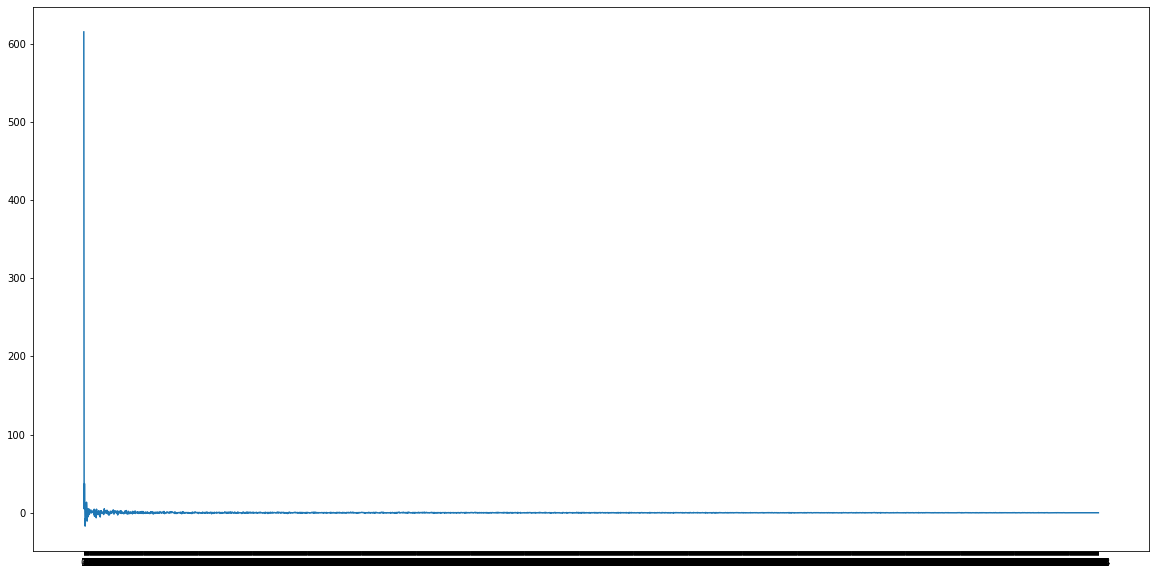

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))  
s = X.sum(axis = 0)
ax.plot(s)

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(features)
X_test=scaling.transform(features)
# X_train = scaling.transform(X_train)
# X_val=scaling.transform(X_val)
# X_test = scaling.transform(X_test)

## 4 - Model Selection

SVC

One vs. Rest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
clf_SVC_basic = svm.SVC(kernel="rbf")
clf_SVC_OneVsRest = OneVsRestClassifier(estimator=clf_SVC_basic)
clf_SVC = clf_SVC_OneVsRest.fit(X_train,y_train)
dump(clf_SVC, 'clf_SVC_scaled_1.joblib')

In [ ]:
clf_SVC = load('clf_SVC_scaled_1.joblib') # Loading scaled trained model

In [ ]:
y_pred_SVC_1 = clf_SVC.predict(X_test)

ValueError: ignored

In [ ]:
datafram=pandas.DataFrame(y_pred_SVC_1) 

In [ ]:
datafram

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
datafram.to_csv("svm_results.csv",index=False)

In [ ]:
print('accuracy: ',accuracy_score(y_val, y_pred_SVC_1))
print('f1: ',f1_score(y_val, y_pred_SVC_1,average='weighted'))

print(classification_report(y_val, y_pred_SVC_1))

NameError: ignored

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = clf_SVC.decision_function(X_val)
for i in range(Y[0].shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
for i in range(Y[0].shape[0]):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()